In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy.stats as ss
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist, squareform

from scipy.interpolate import griddata

import seaborn as sns

from netCDF4 import Dataset

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

In [13]:
# import cruise data

in_file = '../data/KuroAlldata.csv'
data = pd.read_csv(in_file, sep = ',')
data['theta'] = sw.conversions.pt_from_t(data['S'], data['T(C)'], data['depth (m)'])


in_file = '../data/Kuroshio_Phytoplankton.csv'
phyto = pd.read_csv(in_file, sep = ',')

in_file = '../data/data_CHL.csv'
chl = pd.read_csv(in_file, sep = ',')

phyto['sample'] = phyto["STATION"] + '-' + phyto["BOTTLE"]

/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:809: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/Users/sclayton/anaconda/lib/python2.7/site-packages/gsw-3.0.3-py2.7.egg/gsw/utilities/utilities.py:251: RuntimeWarning: invalid value encountered in less
  SA[SA < 0] = np.ma.masked
/Users/sclayton/anaconda/lib/python2.7/site-packages/gsw-3.0.3-py2.7.egg/gsw/gibbs/library.py:899: RuntimeWarning: invalid value encountered in greater
  nonzero_SA = np.any(SA > 0)


In [14]:
# import CTD data

data.columns

Index([u'station', u'day/mon/yr', u'lat', u'lon', u'bottle', u'depth (m)',
       u'T(C)', u'S', u'sigma_t', u'theta', u'DOC (mg C/l)', u'DOC (uM)',
       u'TDN (mg N/l)', u'TDN (uM)', u'SiO2 (mg SiO2/l)', u'SiO2 (uM)',
       u'DON (mg N/l)', u'DON (uM)', u'NO3 (ug N/l)', u'NO3 (uM)',
       u'NH4 (ug N/l)', u'NH4(uM)', u'TDP (ug P/l)', u'TDP (uM)',
       u'PO4 (ug P/l)', u'PO4 (uM)', u'DOP (ug P/l)', u'DOP (uM)', u'P*',
       u'Si*', u'Pro (cells/l)', u'Pro (mg Cm^3l)', u'Syn (cells/l)',
       u'Syn (mg C/m3)', u'Picoeuks (cells/l)', u'Diatoms (cells/l)',
       u'Dinoflagellates (cells/l)', u'Haptophytes (cells/l)',
       u'Diatom Diversity', u'Dino Diversity', u'Total Diversity',
       u'[TChl a] (ug/l)', u'[TChl b] (ug/l)', u'[TChl c] (ug/l)',
       u'[Caro] (ug/l)', u'[But fuco] (ug/l)', u'[Hex fuco] (ug/l)',
       u'[Allo] (ug/l)', u'[Diad] (ug/l)', u'[Diato] (ug/l)', u'[Fuco] (ug/l)',
       u'[Perid] (ug/l)', u'[Zea] (ug/l)', u'[Chl a] (ug/l)',
       u'[DVChl a] (ug/l

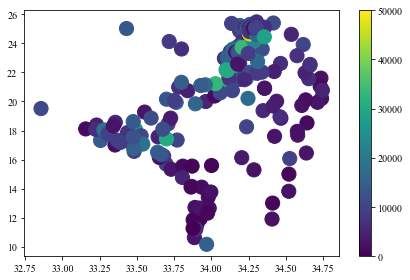

/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


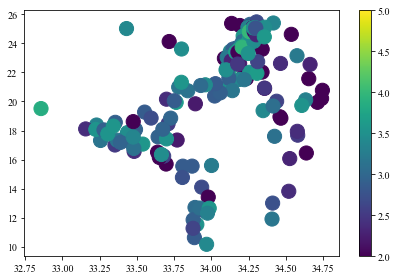

/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


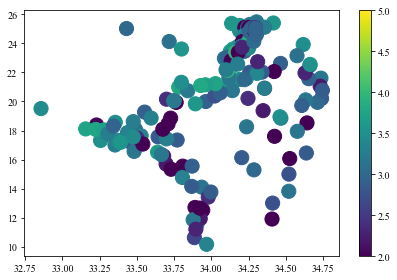

/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


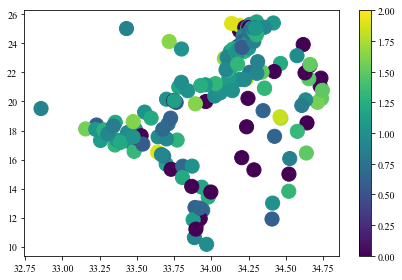

In [31]:
# tlon = 144.5
# sub  = data[data['lon']==tlon]

sub = data

if tlon == 143.5:
    sub = sub[sub['lat']<sub['lat'].max()]

plt.scatter(sub['S'], sub['theta'], s = 200, c = (sub['Haptophytes (cells/l)']), vmax = 50000)
plt.colorbar()
plt.show()

plt.scatter(sub['S'], sub['theta'], s = 200, c = np.log10(sub['Diatoms (cells/l)']), vmin = 2., vmax = 5.)
plt.colorbar()
plt.show()

plt.scatter(sub['S'], sub['theta'], s = 200, c = np.log10(sub['Dinoflagellates (cells/l)']), vmin = 2., vmax = 5.)
plt.colorbar()
plt.show()

plt.scatter(sub['S'], sub['theta'], s = 200, c = np.log10(sub['Dinoflagellates (cells/l)'])/np.log10(sub['Diatoms (cells/l)']), vmin = 0., vmax = 2.)
plt.colorbar()
plt.show()

In [12]:
sub['theta']

80    NaN
81    NaN
82    NaN
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
120   NaN
121   NaN
122   NaN
123   NaN
124   NaN
Name: theta, dtype: float64

In [5]:

# tlon = 144.5
# sub  = chl[chl['lon']==tlon].dropna()

# if tlon == 143.5:
#     sub = sub[sub['lat']<sub['lat'].max()]

# # define grid spacing
# dx = 0.05
# dy = 2
# #define grid
# xi = np.arange(sub['lat'].min(),sub['lat'].max()+dx,dx)
# yi = np.arange(sub['depth (m)'].min(),sub['depth (m)'].max()+dy,dy)

# # grid the data.
# zi = griddata((sub['lat'], sub['depth (m)']), sub['CHL'], (xi[None,:], yi[:,None]), method='cubic')

# zi[zi<0] = 0
# # contour the gridded data, plotting dots at the randomly spaced data points.
# # CS = plt.contour(xi,yi,zii,10,linewidths=1,colors='k')
# CS = plt.contourf(xi,yi,zi,15, cmap=plt.cm.RdYlBu_r)
# plt.colorbar() # draw colorbar
# # plot data points.
# plt.scatter(sub['lat'], sub['depth (m)'],marker='o',c='k',s=5)
# plt.axis([sub['lat'].min(), sub['lat'].max(), sub['depth (m)'].min(), 100])
# plt.gca().invert_yaxis()

# plt.show()